# Wine quality 

## Get the dataset (git clone)

In [ ]:
!git clone https://github.com/ryparmar/sda-datasets

Cloning into 'sda-datasets'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 22 (delta 4), reused 18 (delta 3), pack-reused 0
Unpacking objects: 100% (22/22), done.


## Check of directory and file with data

In [ ]:
!ls sda-datasets

house-prices-regression  README.md  titanic  weather  wine


In [ ]:
!ls sda-datasets/wine

winequality-red.csv


### Import of libraries

In [ ]:
# data visualisation and manipulation
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


#classification
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler, LabelEncoder
from sklearn.tree import DecisionTreeRegressor 

from sklearn.model_selection import train_test_split, GridSearchCV, KFold

#evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score #for classification

from scipy import stats
from scipy.stats import norm, skew #for some statistics

# Increase a figure size
sns.set(rc={'figure.figsize':(12,8)})



### Data load and basic description of data

In [ ]:
df = pd.read_csv("sda-datasets/wine/winequality-red.csv")

In [ ]:
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

We can see that dataset has no missing values

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


### Explanation of variables:
- Fixed acidity
 : measurement of total concentration of titratable acids and free hydrogen ions present in your wine. A litmus paper can be used to identify whether a given solution is acidic or basic. 
- Volatile Acidity: Volatile acidity is mostly caused by bacteria in the wine creating acetic acid — the acid that gives vinegar its characteristic flavor and aroma — and its byproduct, ethyl acetate. Volatile acidity could be an indicator of spoilage, or errors in the manufacturing processes 
- Citric Acid: Citric acid is generally found in very small quantities in wine grapes. It acts as a preservative and is added to wines to increase acidity, complement a specific flavor or prevent ferric hazes
- Residual Sugars: Residual Sugar, or RS for short, refers to any natural grape sugars that are leftover after fermentation ceases (whether on purpose or not). The juice of wine grapes starts out intensely sweet, and fermentation uses up that sugar as the yeasts feast upon it.
- Chloride: The amount of chlorides present in a wine is usually an indicator of its “saltiness.” This is usually influenced by the territory where the wine grapes grew, cultivation methods, and also the grape type. Too much saltiness is considered undesirable. The right proportion can make the wine more savory.
- Sulphur Dioxide levels: Sulfur dioxide exists in wine in free and bound forms, and the combinations are referred to as total SO2. It’s the most common preservative used, usually added by wine makers to protect the wine from negative effects of exposure to air and oxygen. 
- Density: Also known as specific gravity, it can be used to measure the alcohol concentration in wines. During fermentation, the sugar in the juice is converted into ethanol with carbon dioxide as a waste gas. Monitoring the density during the process allows for optimal control of this conversion step for highest quality wines. Sweeter wines generally have higher densities.
- pH: pH stands for power of hydrogen, which is a measurement of the hydrogen ion concentration in the solution. Generally, solutions with a pH value less than 7 are considered acidic, with some of the strongest acids being close to 0. Solutions above 7 are considered alkaline or basic. The pH value of water is 7, as it is neither an acid nor a base.
- Sulphates: Sulfates are salts of sulfuric acid. They aren’t involved in wine production, but some beer makers use calcium sulfate — also known as brewers’ gypsum — to correct mineral deficiencies in water during the brewing process. It also adds a bit of a “sharp” taste.
- Alcohol: ... :)

Heatmap to have first insight to the data

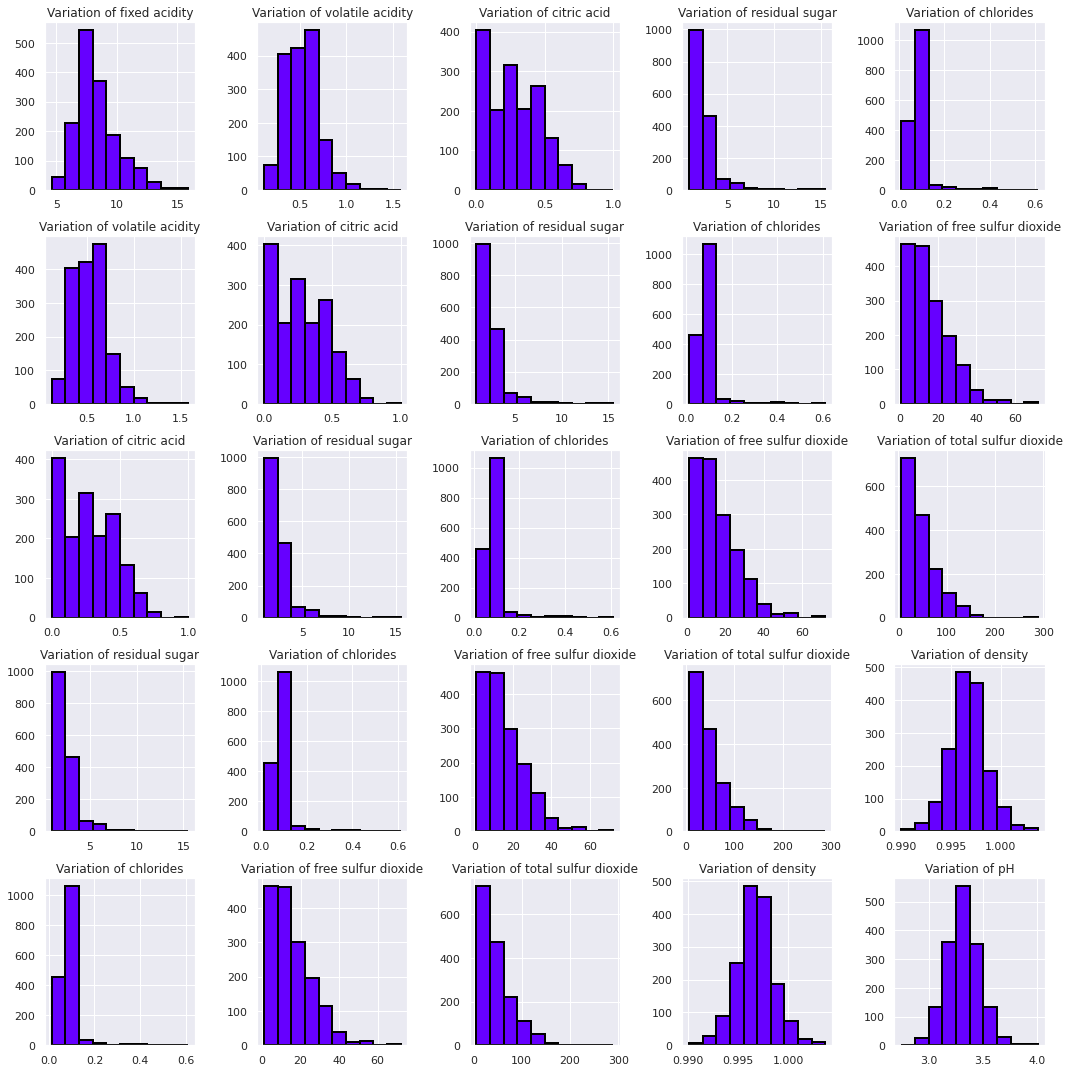

In [ ]:
fig,axes = plt.subplots(5,5)
columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']
for i in range (5):
    for j in range (5):
        axes[i,j].hist(x=columns[i+j],data=df,edgecolor='#000000',linewidth=2,color='#6600ff')
        axes[i,j].set_title('Variation of '+columns[i+j])
fig=plt.gcf()
fig.set_size_inches(15,15)
fig.tight_layout()

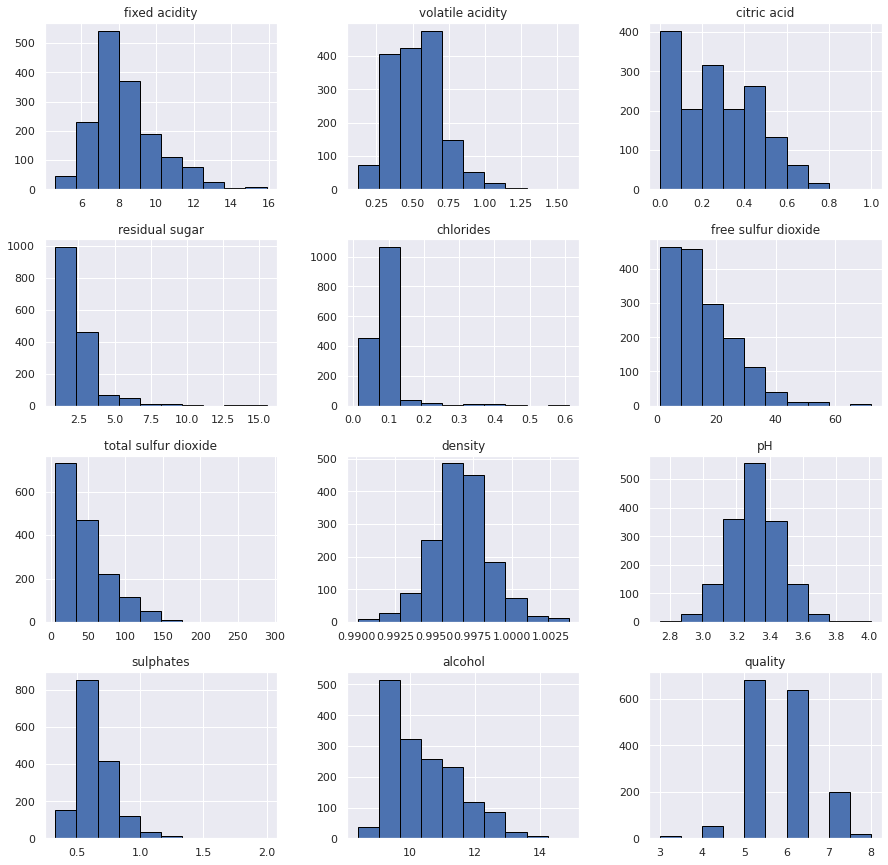

In [ ]:
df.hist(edgecolor='black',figsize=(15,15))
plt.show()

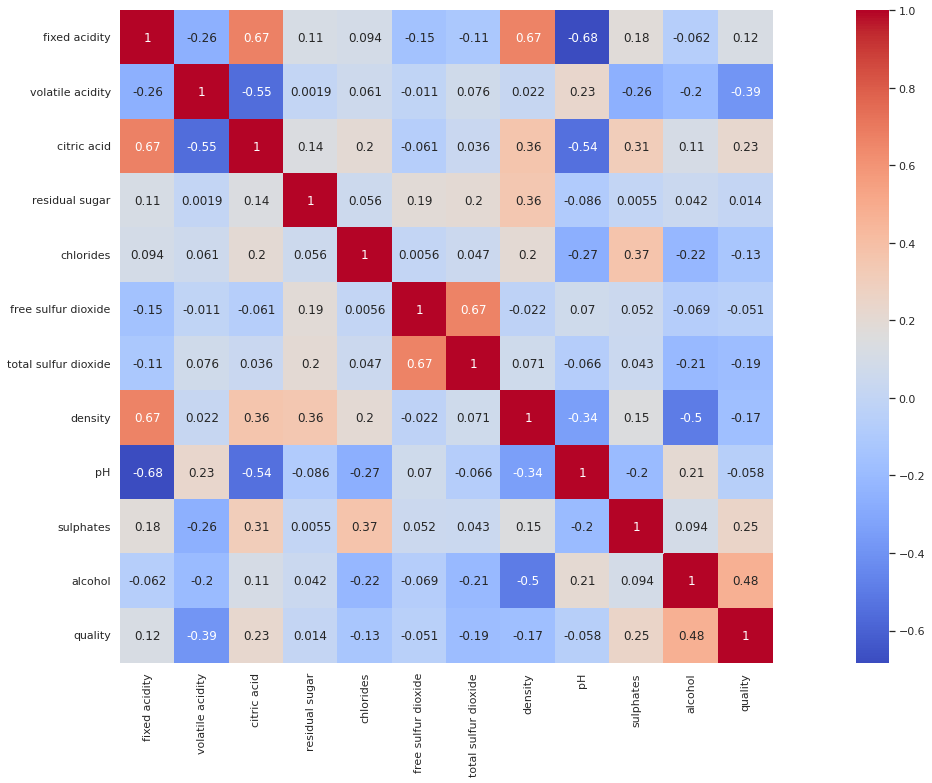

In [ ]:
cormat = df.corr()
fig, ax = plt.subplots(figsize = (30,12))
sns.heatmap(cormat, square = True, cmap = 'coolwarm', annot = True)

From the heatmap we can see make some Inferences:

The quality of wine is related to volatile acidity \
The quality of wine is highly corelated to alcohol \
pH and citric acid/ fixed acidity are highly inversely related (more acid = lower pH) \
density is highly related to fixed acidity and inversely to alcohols

It would be good to see data distribution in different way than before, therefore we going to use scatter plot

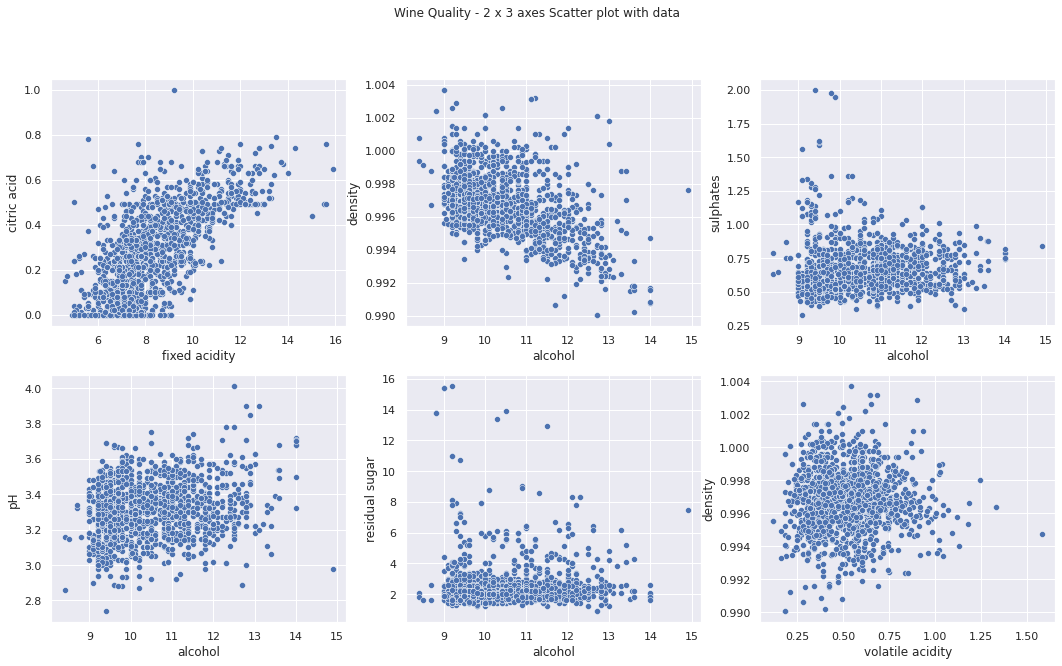

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
 
fig.suptitle('Wine Quality - 2 x 3 axes Scatter plot with data')
 
#iris = sns.load_dataset("iris")
 
sns.scatterplot(ax=axes[0, 0], data=df, x='fixed acidity', y='citric acid')
sns.scatterplot(ax=axes[0, 1], data=df, x='alcohol', y='density')
sns.scatterplot(ax=axes[0, 2], data=df, x='alcohol', y='sulphates')
sns.scatterplot(ax=axes[1, 0], data=df, x='alcohol', y='pH')
sns.scatterplot(ax=axes[1, 1], data=df, x='alcohol', y='residual sugar')
sns.scatterplot(ax=axes[1, 2], data=df, x='volatile acidity', y='density')

Density and Alcohol are main variables which have best correlation, so it will be good to make Feature engineering and try to find combination of more variables

In [ ]:
def adjusted_r2_score(r2, n, p):
  return 1-(1-r2)*(n-1)/(n-p-1)

Global variables

In [ ]:
df["acid"] = 1 * df['citric acid'] + 1 * df['fixed acidity'] + 9.5 * df["pH"] + 1.6 * df["sulphates"] + 0.8*df["residual sugar"] 

In [ ]:
x = df[["density", "acid"]]
y = df["alcohol"]
y_rs = y.values.reshape(-1,1)

Linear Regression

In [ ]:

model = LinearRegression().fit(X=x, y=y)
preds = model.predict(x)

model.intercept_
model.coef_
model.score(x, y)

# The mean squared (L2) error
print("Mean squared error: %.2f" % mean_squared_error(y, preds, squared=False))
# The mean absolute (L1) error
print("Mean squared error: %.2f" % mean_absolute_error(y, preds))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.4f" % r2_score(y, preds))

n, p = x.shape
preds = model.predict(x)
r2 = r2_score(y, preds)
n, p = x.shape
print("Adjusted coefficient of determination: %.4f" % adjusted_r2_score(r2, n, p))

Mean squared error: 0.67
Mean squared error: 0.52
Coefficient of determination: 0.6026
Adjusted coefficient of determination: 0.6021


Linear Regression with standardized values

In [ ]:

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
y_scaled = scaler.fit_transform(y_rs)

model = LinearRegression().fit(X=x_scaled, y=y_scaled)
preds = model.predict(x_scaled)

model.intercept_
model.coef_
model.score(x_scaled, y_scaled)

# The mean squared (L2) error
print("Mean squared error: %.2f" % mean_squared_error(y_scaled, preds, squared=False))
# The mean absolute (L1) error
print("Mean squared error: %.2f" % mean_absolute_error(y_scaled, preds))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.4f" % r2_score(y_scaled, preds))

n, p = x.shape
preds = model.predict(x_scaled)
r2 = r2_score(y_scaled, preds)
n, p = x.shape
print("Adjusted coefficient of determination: %.4f" % adjusted_r2_score(r2, n, p))

Mean squared error: 0.63
Mean squared error: 0.48
Coefficient of determination: 0.6026
Adjusted coefficient of determination: 0.6021


Polynomial Regression

In [ ]:
poly = PolynomialFeatures(degree=3, include_bias=False)

x_poly = poly.fit_transform(x)

model = LinearRegression()
model.fit(X=x_poly, y=y_rs)
poly_preds = model.predict(x_poly)
print("Coefficient of determination: %.4f" % r2_score(y_rs, poly_preds))

Coefficient of determination: 0.6736


Decision Tree

In [ ]:
clf = DecisionTreeRegressor(max_depth = 10)
clf = clf.fit(x, y)
preds = clf.predict(x)
r2_score(y, preds)

0.8876953828686229

We have few models fitted on our data and now it is good to make tran-test split to see how scores are going to change if change data a little bit

Train - Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=11, shuffle=True)

Decision Tree Regressor - according to the range of parameters it will find best parameters for decison tree

In [ ]:
dt = DecisionTreeRegressor()
parameters_grid = {
    "max_depth": [5, 8, 10, 12, 15, 20],
    "min_samples_split": [16, 20, 24, 28, 32, 36, 40, 44],
    "min_samples_leaf": [1, 2, 3, 4, 6, 8, 10, 12, 15, 20, 25, 30, 50]
}
reg = GridSearchCV(dt, parameters_grid, scoring="r2")
reg.fit(X_train, y_train)

reg.best_params_

{'max_depth': 12, 'min_samples_leaf': 4, 'min_samples_split': 32}

In [ ]:
dt = DecisionTreeRegressor(max_depth=reg.best_params_["max_depth"], min_samples_leaf=reg.best_params_["min_samples_leaf"], min_samples_split=reg.best_params_["min_samples_split"])
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=12, min_samples_leaf=4, min_samples_split=32)

In [ ]:
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

print(f"Training R2: {round(r2_score(y_train, y_pred_train), 2)}\tTest R2:  {round(r2_score(y_test, y_pred_test), 2)}")
print(f"Training MSE: {round(mean_squared_error(y_train, y_pred_train), 4)}\tTest MSE:  {round(mean_squared_error(y_test, y_pred_test), 4)}")

Training R2: 0.76	Test R2:  0.55
Training MSE: 0.2814	Test MSE:  0.4812


In [ ]:
clf = DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)
preds_train = clf.predict(X_train)
preds_test = clf.predict(X_test)

r2_score_train = r2_score(y_train, preds_train)
r2_score_test = r2_score(y_test, preds_test)

print(f"Train R2: {round(r2_score_train, 2)}\tTest R2: {round(r2_score_test, 2)}")

Train R2: 1.0	Test R2: 0.51


In [ ]:
model = LinearRegression().fit(X=X_train, y=y_train)

r2_train = r2_score(y_train, model.predict(X_train))
r2_test = r2_score(y_test, model.predict(X_test))

n, p = x.shape
adj_r2_score_train = adjusted_r2_score(r2_train, n, p)
adj_r2_score_test = adjusted_r2_score(r2_test, n, p)

print(f"Adj Train R2: {round(adj_r2_score_train, 2)}\tAdj Test R2: {round(adj_r2_score_test, 2)}")

Adj Train R2: 0.62	Adj Test R2: 0.53


From the final numbers we can see best results had linear regression model with score 0.53 for test data \
That means we can predict with 53% probability how much alcohol will wine have according to information about **citric acid**, **fixed acidity**, **pH**, **sulphates** and **residual sugar** 

Well, probably it's not most useful thing, but we can guess a little ;)